<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/Project3ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import math
import pandas as pd
import numpy as np
import matplotlib as plt

In [10]:
def f(x):
    y = 3*x**4 + 7*x**3 - 17 
    return y

def fprime(x):
    yprime = 12*x**3 + 21*x**2
    return yprime

def absolute_relative_error(x,x_1):
    epsilon = abs((x_1 - x) / x_1) 
    return epsilon

def returnfunc(x):
    return x

In [11]:
#empty dataframes just in case

x = pd.DataFrame({'x_i estimate':[newton_raphson(i,.0001,0) for i in range(-10,-1)]})
y = pd.DataFrame({'x_0':[i for i in range(-10,-1)]})
iteration = pd.DataFrame({'iteration count': [iterations(i,.0001,0) for i in range(-10,-1)]})
pd.concat([y,x,iteration],axis=1)

NameError: ignored

In [ ]:
def datapoint(x_0):
    x_1 = x_0 - (f(x_0) / fprime(x_0))
    return x_1

In [ ]:
#newton raphson method; n will always be 0, it is our counter for iterations
def newton_raphson(x_0,tol,n):
    x_1 = datapoint(x_0)
    error = absolute_relative_error(x_0,x_1)
    if error <= tol:
        return x_1
    else:
        n+=1
        return newton_raphson(datapoint(x_0),tol,n)

In [ ]:
#returns number of iterations
def iterations(x_0,tol,n):
    x_1 = datapoint(x_0)
    error = absolute_relative_error(x_0,x_1)
    if error <= tol:
        return n
    else:
        n+=1
        return iterations(datapoint(x_0),tol,n)

In [ ]:
iterations(6,.0001,0)

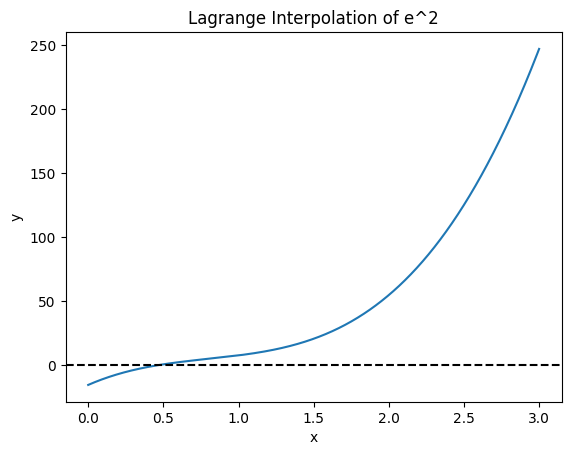

Root Estimate	Error	Iterations
0.478413	0.000091	1


IndexError: ignored

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to find roots for
def f(x):
    return L(x) - y

# Define the Lagrange interpolation function for e^2
def L(x):
    x_vals = np.array([center, center+0.1, center+0.2, 2*center])
    y_vals = np.array([np.exp(2*center), np.exp(2*(center+0.1)), np.exp(2*(center+0.2)), np.exp(4*center)])
    n = len(x_vals)
    L = 0
    for i in range(n):
        li = 1
        for j in range(n):
            if j != i:
                li *= (x - x_vals[j])/(x_vals[i] - x_vals[j])
        L += y_vals[i] * li
    return L

# Set the center value and target value y
center = 1
y = 0

# Plot the Lagrange interpolation function
x_vals = np.linspace(0, 3, 1000)
y_vals = L(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation of e^2')
plt.show()

# Set the initial endpoints and tolerance for the false-position algorithm
a = 0.1
b = 2.5
tol = 0.0001
max_iter = 1000

# Apply the false-position algorithm to estimate the roots of f(x)
root_estimates = []
errors = []
iterations = []

while len(root_estimates) < 3 and len(iterations) < max_iter:
    # Compute the false-position estimate
    c = a - ((f(a) * (b - a)) / (f(b) - f(a)))
    
    # Compute f(c)
    fc = f(c)
    
    # Check if we have found a root
    if abs(fc) < tol:
        root_estimates.append(c)
        errors.append(abs(fc))
        iterations.append(len(iterations)+1)
        # Update the endpoints for the next root
        if abs(f(a)) < abs(f(b)):
            b = c
        else:
            a = c
    else:
        # Update the endpoints
        if f(a) * fc < 0:
            b = c
        else:
            a = c
    # If the interval is too small, stop searching
    if abs(b-a) < tol:
        break

# Print the results table
print("Root Estimate\tError\tIterations")
for i in range(3):
    print("{:.6f}\t{:.6f}\t{}".format(root_estimates[i], errors[i], iterations[i]))
